# Loan Application Status Prediction


Problem Statement: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

# Data Collection and Preprocessing


In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the CSV file.

loan=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')


In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

In [5]:
# Checking the column names.

loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Checking the Dataset summary.

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are total 8 columns with object data type, 4 column with float data type, 1 coulm with int data type.

In [7]:
# Checking the Dataset's data types.

loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are total 8 columns with object data type, 4 column with float data type, 1 coulm with int data type.

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in columns,'Gender','Married','Dependents','Self_Employed','LoanAmount','LoanAmountTerm','Credit_History'.

In [9]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Almost all columns have unique values but Loan_ID,ApplicantIncome,CoapplicantIncome and Loan_Amount have large no of unique values

# Exploratory Data Analysis/EDA


In [10]:
# Checking the Dataset Statistical Summary. 

loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here total counts, mean, std, min, 25%, 50%, 75%, max are very much differing values as null values are present in our dataset.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

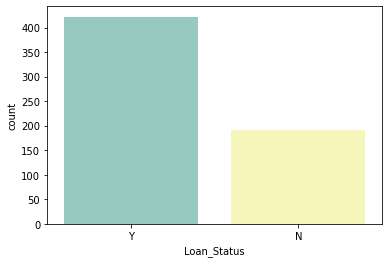

In [11]:
# Visualizing loan_status column using countplot.

sns.countplot(x = 'Loan_Status', data = loan, palette="Set3")

In [12]:
(loan["Loan_Status"]=="Y").value_counts()

True     422
False    192
Name: Loan_Status, dtype: int64

From Above we can say that total loan approvals are 422 and not approved are 192.

# Visualizing Categorical Variables

<AxesSubplot:title={'center':'Gender'}>

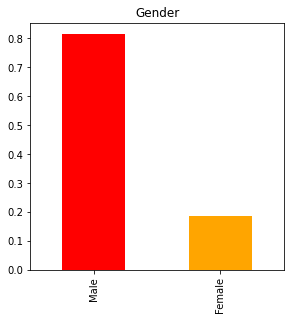

In [13]:
# Visualizing Gender column using bar plot.

plt.figure(1)
plt.subplot(221)
loan["Gender"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Gender",color=["red","orange"])

<AxesSubplot:title={'center':'Self_Employed'}>

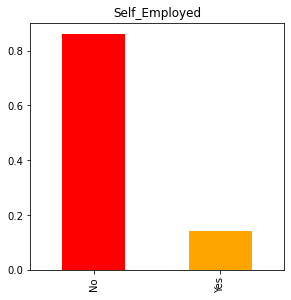

In [14]:
# Visualizing self_employed column using bar plot.

plt.figure(1)
plt.subplot(222)
loan["Self_Employed"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Self_Employed",color=["red","orange"])

<AxesSubplot:title={'center':'Credit_History'}>

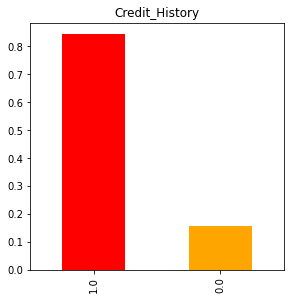

In [15]:
# Visualizing Credit_History column using bar plot.

plt.figure(1)
plt.subplot(222)
loan["Credit_History"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Credit_History",color=["red","orange"])

<AxesSubplot:title={'center':'Married'}>

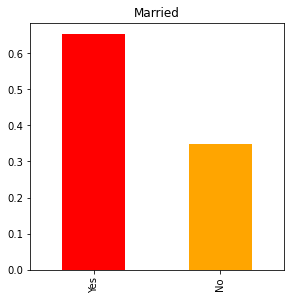

In [16]:
# Visualizing Married column using bar plot..

plt.figure(1)
plt.subplot(222)
loan["Married"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Married",color=["red","orange"])

# Observations

From above bar plot, 

Male applying for loan are more as compared to female.

Maximum Self_Employed individuals applied for loan as compared to others.

Maximum no.of individuals have repaid their debits.

Maximun married ones are applying for loan as compared to un-married.

# Ordinal Variable

<AxesSubplot:xlabel='Dependents', ylabel='count'>

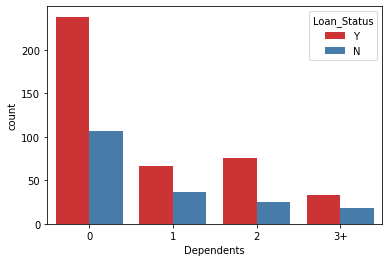

In [17]:
# Visualizing Dependents column regarding Loan_Status column.

sns.countplot(x="Dependents", hue="Loan_Status", data=loan, palette="Set1")

<AxesSubplot:xlabel='Education', ylabel='count'>

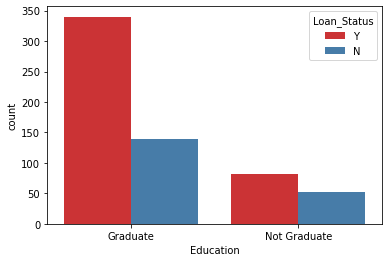

In [18]:
# Visualizing Education column regarding Loan_Status column.

sns.countplot(x="Education", hue="Loan_Status", data=loan, palette="Set1")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

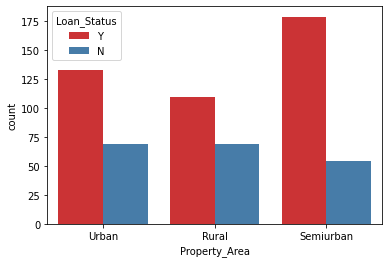

In [19]:
# Visualizing Property_Area column regarding Loan_Status column.

sns.countplot(x="Property_Area", hue="Loan_Status", data=loan, palette="Set1")

# Observation

From above count plot, 

Most no. of loan approved individuals are independent not dependent.

Maximum no. of loans are approved to graduate individuals as compared to under-graduates.

Most of the loans are approved to semiurban area.



# Visualizing Independent Numerical Variables

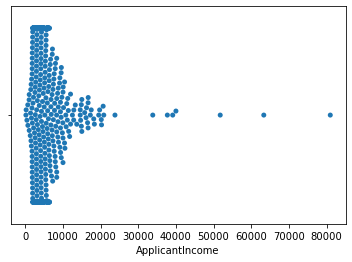

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing Aplicantincome column using swarmplot.
plt.figure(1)
sns.swarmplot(loan["ApplicantIncome"])
plt.show()

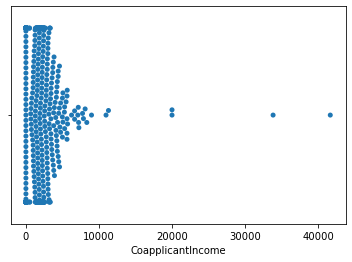

In [21]:
# Visualizing CoapplicantIncome Using swarm plot.

plt.figure(1)
sns.swarmplot(loan["CoapplicantIncome"])
plt.show()

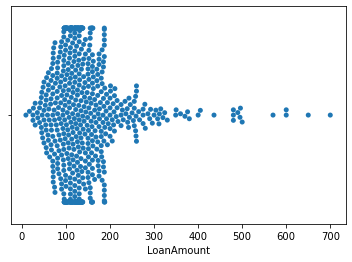

In [22]:
# Visualizing LoanAmount column using swarmplot.

plt.figure(1)
sns.swarmplot(loan["LoanAmount"])
plt.show()

# Observations

Here from above, 

We can see that there are outliers in ApplicantIncome column.

We can see that there are outliers in CoapplicantIncome column.

Similarly, outliers are present in LoanAmount column.

# Again Visualizing these three columns to check normality.

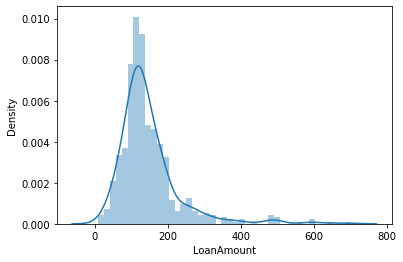

In [23]:
# Visualizing Loan Amount using Dist plot.

plt.figure(1)
sns.distplot(loan["LoanAmount"])
plt.show()

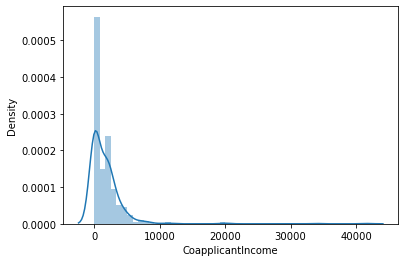

In [24]:
# Visualizing Coapplicant column using dist plot.

plt.figure(1)
sns.distplot(loan["CoapplicantIncome"])
plt.show()

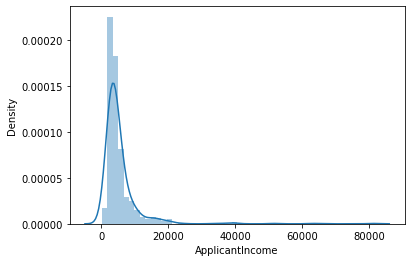

In [25]:
# Visualizing the ApplicantIncome column using dist plot.

plt.figure(1)
sns.distplot(loan["ApplicantIncome"])
plt.show()

# Observations

From above we can say that,

the Loan_Amount column is not normally distributed,

the CoapplicantIncome column is not normally distributed,

the ApplicantIncome column is not normally distributed.

# Bivariate Analysis

Visualizing Gender,Married,Self_Employed,Dependents,Credit_History,Property_Area, columns combinely using bar plots in relation with Loan_Status column.

<AxesSubplot:xlabel='Gender'>

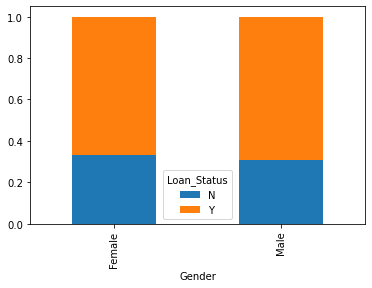

In [26]:
Gender=pd.crosstab(loan['Gender'],loan['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Married'>

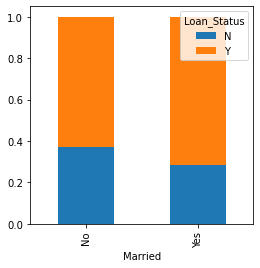

In [27]:
Married=pd.crosstab(loan['Married'],loan['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

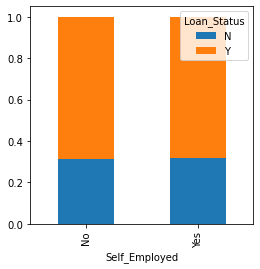

In [28]:
Employed=pd.crosstab(loan['Self_Employed'],loan['Loan_Status']) 
Employed.div(Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

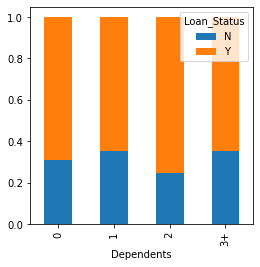

In [29]:
Dependents=pd.crosstab(loan['Dependents'],loan['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

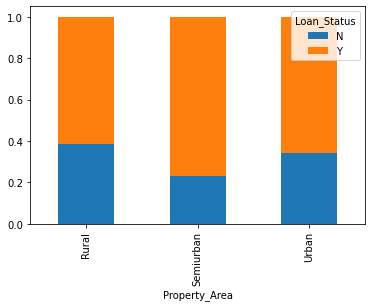

In [30]:
property_a = pd.crosstab(loan["Property_Area"],loan["Loan_Status"])
property_a.div(property_a.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Credit_History'>

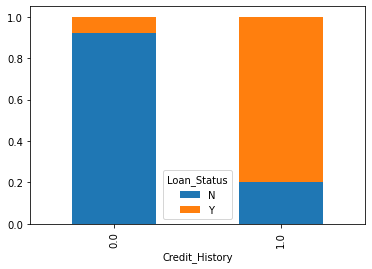

In [31]:
credit_hist = pd.crosstab(loan["Credit_History"],loan["Loan_Status"])
credit_hist.div(credit_hist.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")

# Observations

Both genders(Male & Female) posseses equal probability of loan approval.

Married individuals loan are more approved as comapred to un-married.

Loan approval for self employed and not self_emolyed posseses equal probability of loan approval.

Dependencies with 1, 2,3+ have almost same loan approval probabilty.

Semi urban area has most loan approvals.

Individuals with credit history 1 have most approved loan.

# Multivariate Analysis

<Figure size 2880x2880 with 0 Axes>

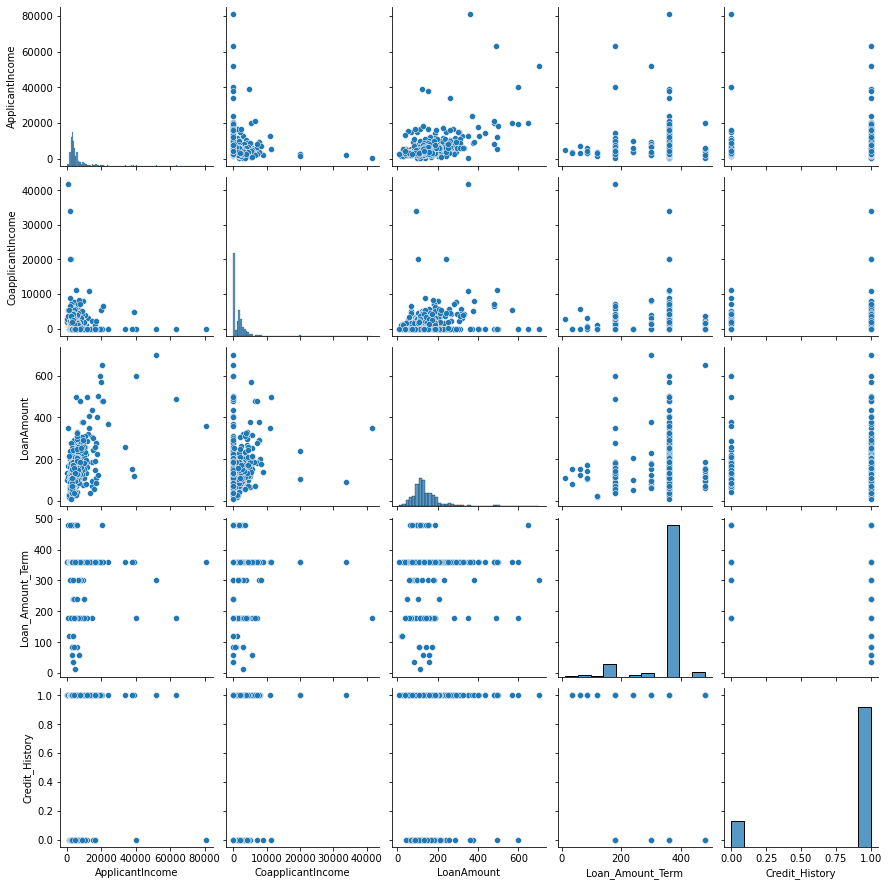

In [32]:
# Visualizing the pairwise relationship between columns.

plt.figure(figsize=(40,40))
sns.pairplot(loan)
plt.show()

From pair plot we observe that,data points doesn't show any linear relationship with each other as data points are too much scattered.

Let's get the 'Dependents' and 'Loan_Status'column encoded for further process.

In [33]:
loan['Dependents'].replace('3+', 3,inplace=True)
loan['Dependents'].replace('3+', 3,inplace=True) 
loan['Loan_Status'].replace('N', 0,inplace=True) 
loan['Loan_Status'].replace('Y', 1,inplace=True)

We successufylly Encoded the columns.

# Checking the Correlation

In [34]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

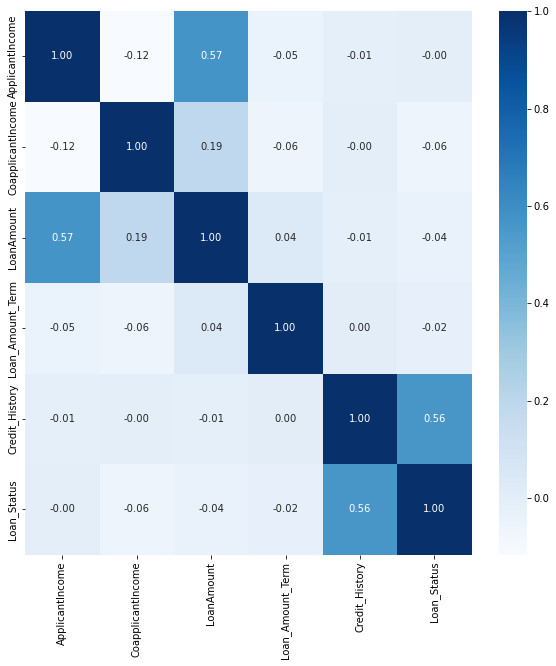

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),cmap='Blues',fmt='0.2f',annot=True)

Here we can see that LoanAmount and ApplicantIncome,Loan_Status and Credit_History are correlated

In [36]:
# Separating the features to check the outliers fro model prediction.

loan_new=loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]

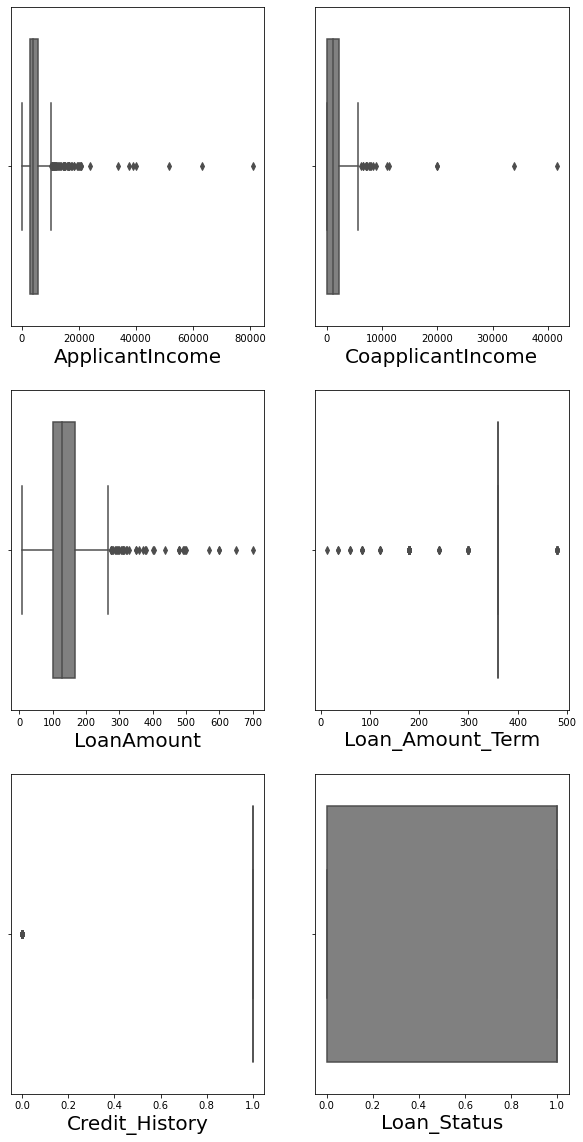

In [37]:
import warnings
warnings.filterwarnings('ignore')

# ploting the box plot for checking the outliers.

plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1
 
for column in loan_new:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(loan_new[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.show()    

All 5 features have outliers but our target column doesn't contain any outlier.

<AxesSubplot:>

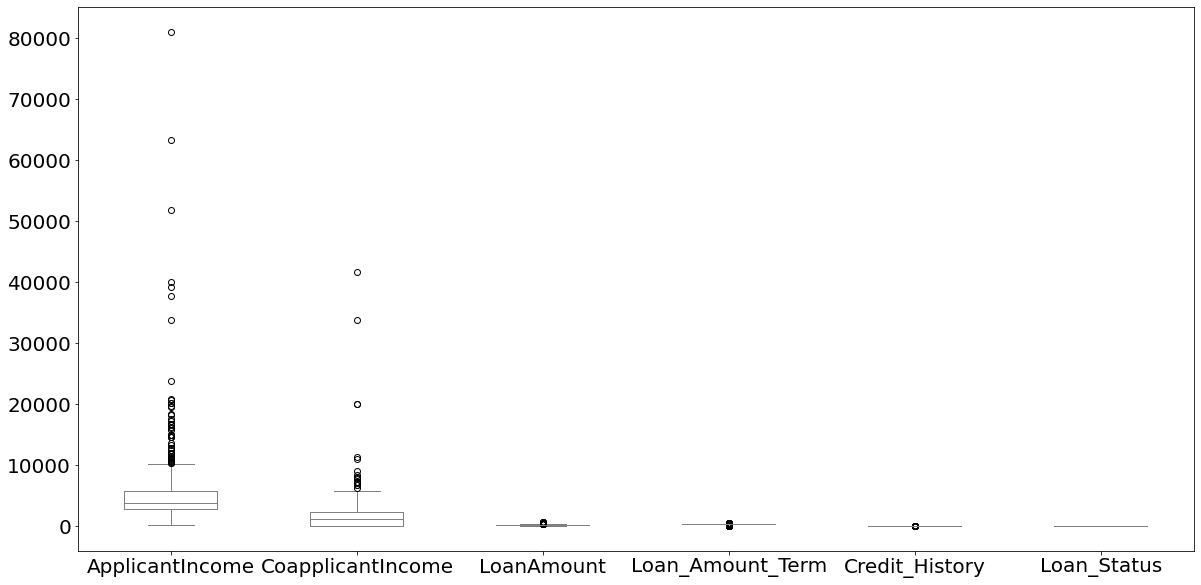

In [38]:
# Againg checking outliers for whole dataset.

loan.plot(kind='box',fontsize=20,figsize=(20,10),color='grey')

Here also we see that 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status' have outliers but 'Loan_Status' doesn't have any outlier.

# Data Cleaning

In [39]:
# Checking the null values in dataset.

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Almost maximum columns contains null values and we have to fill them.

We will use mode imputation for filling null values as our columns are categorical.

In [40]:
# Mode Imputation.

loan["Gender"].fillna(loan["Gender"].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True) 
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True) 
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True) 
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)
print(loan.shape)

(614, 13)


Checking the null values after imputing.

In [41]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We successfully filled all null values.

In [42]:
# We are dropping Loan_ID column as it is not important for model prediction.

loan = loan.drop("Loan_ID",axis=1)
print(loan.shape)

(614, 12)


We successfully dropped the Loan_ID column.

Separating the outliers for outlier removal using zscore.

In [43]:
outliers=loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data_clear=loan[(z<3).all(axis=1)]
data_clear.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [45]:
data_clear.shape

(577, 12)

In [46]:
loan.shape

(614, 12)

In [47]:
# Data loss after outlier removal.

Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

There is not that much data loss after outlier removal, it is not more than 10%.

In [48]:
# Checking the skewness in the dataset.

data_clear.skew()

Dependents           1.052106
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Loan_Status         -0.822635
dtype: float64

We have some skewness in data we will remove it using power transformation.

In [49]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [50]:
# Separating the columns for skewness removal.

data_clear[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(data_clear[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].values)

In [51]:
# Checking skewness after Power tranform.

data_clear.skew()

Dependents           1.052106
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Loan_Status         -0.822635
dtype: float64

In [52]:
# Separating the target column.

x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']

x=features

y=target

Checking shape of data after spliting the data.

In [53]:
print(x.shape)

(614, 11)


In [54]:
y.shape

(614,)

Encoding the categorical columns for further procedure.

In [55]:
x =pd.get_dummies(x) 
loan=pd.get_dummies(loan) 

In [56]:
x.shape

(614, 20)

In [57]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [58]:
scaled=['ApplicantIncome','CoapplicantIncome','LoanAmount']

The above columns needs standardization so we separated them.

In [59]:
# For Standardization we will use StandardScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in scaled:
    x[column] = x[column].astype(float)
    x[[column]] = scaler.fit_transform(x[[column]])


In [60]:
x.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,-0.134412,-0.038732,-0.211241,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,-0.393747,-0.554487,-0.948996,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,-0.462062,0.251980,-0.306435,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,0.097728,-0.554487,-0.056551,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


We successfully standardize the columns.

# Checking the Multicollinearity in dataset using VIF.

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif.head()

,vif_Features,Features
0,1.646622,ApplicantIncome
1,1.146943,CoapplicantIncome
2,1.716057,LoanAmount
3,1.059008,Loan_Amount_Term
4,1.011252,Credit_History


There is no multicollinearity in data.

# Spliting the dataset into train and test

In [62]:
from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(
  
   x, y, test_size = 0.25, random_state = 30)

#  Logistic Regression

In [63]:
# Model Building and Evaluation.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [64]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy: 78.57142857142857
[[ 16  29]
 [  4 105]]
              precision    recall  f1-score   support

           0       0.80      0.36      0.49        45
           1       0.78      0.96      0.86       109

    accuracy                           0.79       154
   macro avg       0.79      0.66      0.68       154
weighted avg       0.79      0.79      0.76       154



# Random Forest Classifier

In [65]:
# Applying RandomForest Classifier for model building and evaluation. 

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_rf)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy: 71.42857142857143
[[15 30]
 [14 95]]
              precision    recall  f1-score   support

           0       0.52      0.33      0.41        45
           1       0.76      0.87      0.81       109

    accuracy                           0.71       154
   macro avg       0.64      0.60      0.61       154
weighted avg       0.69      0.71      0.69       154



# Decision Tree Classifier

In [66]:
# Applying DecisionTree Classifier for model building and evaluation. 

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 62.98701298701299
[[18 27]
 [30 79]]
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        45
           1       0.75      0.72      0.73       109

    accuracy                           0.63       154
   macro avg       0.56      0.56      0.56       154
weighted avg       0.64      0.63      0.63       154



# Support Vector Classifier

In [67]:
# Support Vector Classifier 

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 70.77922077922078
[[  0  45]
 [  0 109]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.71      1.00      0.83       109

    accuracy                           0.71       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.50      0.71      0.59       154



# KNeighbors Classifier

In [69]:
# Applying KNeighbors Classifier for model building and evaluation. 


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_knn)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


Accuracy: 70.12987012987013
[[10 35]
 [11 98]]
              precision    recall  f1-score   support

           0       0.48      0.22      0.30        45
           1       0.74      0.90      0.81       109

    accuracy                           0.70       154
   macro avg       0.61      0.56      0.56       154
weighted avg       0.66      0.70      0.66       154



# Checking the cross validation score for each model

In [71]:
# Logistic Regression

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=13)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.8110679214402619


In [72]:
# # Let's check the cross validation score for RandomForest classifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=13)
print('Cross_validation_score for RandomForest is:',cvs.mean())

Cross_validation_score for RandomForest is: 0.7898595199127114


In [73]:
# Let's check the cross validation score Decision tree classifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=13)
print('Cross_validation_score for Decision tree classifier is:',cvs.mean())


Cross_validation_score for Decision tree classifier is: 0.7017866884888162


In [74]:
# Checking the cross validation score for SVC.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=13)
print('Cross_validation_score for SVC is:',cvs.mean())


Cross_validation_score for SVC is: 0.6872954173486087


In [75]:
# Let's check the cross validation score for KNeighborsClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=13)
print('Cross_validation_score for KNeighborsClassifier is:',cvs.mean())

Cross_validation_score for KNeighborsClassifier is: 0.7100381887615929


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference for Logistic Regression,so we will perform hyper parameter tunning for both and then will deceide.

# Hyperparameter Tunning

In [118]:
lr=LogisticRegression()

weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [119]:
# print best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.8835287815013029
Best hyperparameters:  {'C': 10, 'class_weight': {0: 0.4741683366733467, 1: 0.5258316633266533}, 'penalty': 'l2'}


In [121]:
# Building Model again with best params

lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(x_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [122]:
y_pred_prob_test = lr2.predict_proba(x_test)[:, 1]

In [123]:
y_pred_test = lr2.predict(x_test)

Model Evaluation 

In [127]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, y_pred_test),'\n')


# ROC- AUC score
print("ROC-AUC score  test dataset:", roc_auc_score(y_test,y_pred_prob_test),'\n')

#Precision score
print("precision score  test dataset:", precision_score(y_test,y_pred_test),'\n')

#Recall Score
print("Recall score  test dataset:", recall_score(y_test,y_pred_test),'\n')

#f1 score
print("f1 score  test dataset :", f1_score(y_test,y_pred_test))

[[ 16  29]
 [  4 105]] 

ROC-AUC score  test dataset: 0.6711518858307849 

precision score  test dataset: 0.7835820895522388 

Recall score  test dataset: 0.963302752293578 

f1 score  test dataset : 0.8641975308641976


# Reason For Selecting Logistic Regression Model

After Hyper parameter tunning we get the above scores for our model which are very well good,as score got improving,So we can say that Logistic Regression is best fit model for our dataset. 

# Saving the Model

In [131]:
# Saving the model in the pickle format

import pickle
pickle.dump(lr,open('loan.pkl', 'wb'))